<a href="https://colab.research.google.com/github/sungjindo/black_coal_price/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0.Module

In [ ]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import os

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot #plotly offline mode 
init_notebook_mode(connected = True)
import plotly.graph_objs as go #plotly graphical object
%matplotlib notebook
%matplotlib inline

# 통계 및 기계학습 관련 라이브러리
from scipy import stats    # 통계 관련 라이브러리
from sklearn.model_selection import train_test_split, RandomizedSearchCV    # 데이터 셋 분류 라이브러리
from sklearn.utils import resample    # 데이터 업샘플링&다운샘플링 라이브러리
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN    # 복합샘플링 라이브러리
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler    # 데이터 스케일링 라이브러리
from statsmodels.stats.outliers_influence import variance_inflation_factor    # 변수 간 다중공선성 확인(VIF) 라이브러리
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, plot_confusion_matrix, plot_roc_curve)    # 모델 정확도 검증 라이브러리
from sklearn.model_selection import cross_val_score, train_test_split   # validation  검증 라이브러리

import matplotlib.pyplot as plt
import matplotlib

import statsmodels.api as sm    # 통계분석 관련 라이브러리
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from fbprophet import Prophet


import warnings    # 경고문구 지우기
warnings.filterwarnings("ignore")

# xgboost라이브러리 추가
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from xgboost import XGBClassifier
from datetime import datetime

from google.colab import drive
drive.mount('/content/gdrive')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Mounted at /content/gdrive


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

#1.Data

In [ ]:
df = pd.read_excel("/content/gdrive/My Drive/Black_coal/data/dataset/project_dataset.xlsx")
df = df.sort_values('date')
df = df.rename(columns ={'date':'ds'})
df['ds']= pd.to_datetime(df['ds'])

df = df.set_index('ds')
df = df[df.index < '2019-04-01']
df = df.reset_index()
# df = df[['ds','Coal_price']]
df  

,ds,Coal_price,iron,Brent_fut,copper_fut,WTI_fut,WTI,LNG_fut,bdi,USD/AUD(호주),...,영국지수,독일지수,S&P500지수,항셍지수,나스닥지수,코스피지수,니케이225지수,유로스톡스50지수,호주지수,캐나다지수
0,2011-01-01,122.65,168.30,94.75,9644.00,91.38,91.40,61.07,1773.0,0.98447,...,5899.899902,6914.189941,1257.640015,23035.449219,2652.870117,2051.000000,10228.919922,2807.040039,4745.200195,13443.200195
1,2011-01-02,122.65,168.30,94.75,9644.00,91.38,91.40,61.07,1773.0,0.98447,...,5899.899902,6914.189941,1257.640015,23035.449219,2652.870117,2051.000000,10228.919922,2807.040039,4745.200195,13443.200195
2,2011-01-03,136.50,170.00,94.84,9644.00,91.55,91.56,61.07,1773.0,0.97901,...,5899.899902,6989.740234,1271.869995,23436.050781,2691.520020,2070.080078,10228.919922,2839.429932,4745.200195,13443.200195
3,2011-01-04,137.30,172.10,93.53,9619.25,89.38,89.23,58.32,1693.0,0.98337,...,6013.899902,6975.350098,1270.199951,23668.480469,2681.250000,2085.139893,10398.099609,2844.169922,4742.500000,13402.299805
4,2011-01-05,130.65,174.50,95.50,9586.00,90.30,90.38,56.40,1621.0,0.99285,...,6043.899902,6939.819824,1276.560059,23757.820312,2702.199951,2082.550049,10380.769531,2833.739990,4714.899902,13396.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007,2019-03-27,93.50,85.72,67.83,6336.00,59.41,59.12,37.47,690.0,1.40115,...,7194.200195,11419.040039,2805.370117,28728.250000,7643.379883,2145.620117,21378.730469,3322.040039,6136.000000,16132.500000
3008,2019-03-28,92.95,85.64,67.82,6368.75,59.30,59.30,36.05,692.0,1.41153,...,7234.299805,11428.160156,2815.439941,28775.210938,7669.169922,2128.100098,21033.759766,3320.290039,6176.100098,16155.500000
3009,2019-03-29,92.75,85.70,68.39,6475.75,60.14,59.98,34.61,689.0,1.41180,...,7279.200195,11526.040039,2834.399902,29051.359375,7729.319824,2140.669922,21205.810547,3351.709961,6180.700195,16102.099609
3010,2019-03-30,92.75,85.70,68.39,6475.75,60.14,59.98,34.61,689.0,1.41180,...,7279.200195,11526.040039,2834.399902,29051.359375,7729.319824,2140.669922,21205.810547,3351.709961,6180.700195,16102.099609


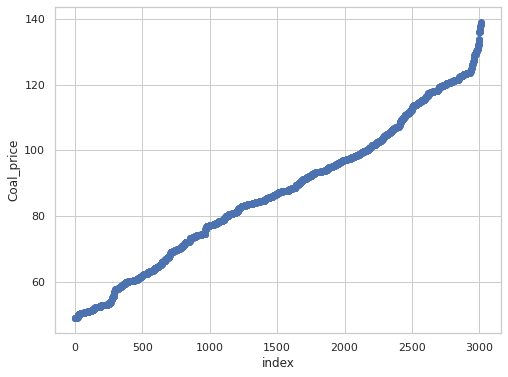

In [ ]:
sns.set(rc={'figure.figsize':(14.7,6)})
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
plt.scatter(range(df.shape[0]), np.sort(df['Coal_price'].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Coal_price', fontsize=12)
plt.show()

In [ ]:
minmax = pd.DataFrame()

In [ ]:
df['US dollars'] = df['US 달러지수']
df

,ds,Coal_price,iron,Brent_fut,copper_fut,WTI_fut,WTI,LNG_fut,bdi,USD/AUD(호주),...,독일지수,S&P500지수,항셍지수,나스닥지수,코스피지수,니케이225지수,유로스톡스50지수,호주지수,캐나다지수,US dollars
0,2011-01-01,122.65,168.30,94.75,9644.00,91.38,91.40,61.07,1773.0,0.98447,...,6914.189941,1257.640015,23035.449219,2652.870117,2051.000000,10228.919922,2807.040039,4745.200195,13443.200195,79.288002
1,2011-01-02,122.65,168.30,94.75,9644.00,91.38,91.40,61.07,1773.0,0.98447,...,6914.189941,1257.640015,23035.449219,2652.870117,2051.000000,10228.919922,2807.040039,4745.200195,13443.200195,79.288002
2,2011-01-03,136.50,170.00,94.84,9644.00,91.55,91.56,61.07,1773.0,0.97901,...,6989.740234,1271.869995,23436.050781,2691.520020,2070.080078,10228.919922,2839.429932,4745.200195,13443.200195,79.384003
3,2011-01-04,137.30,172.10,93.53,9619.25,89.38,89.23,58.32,1693.0,0.98337,...,6975.350098,1270.199951,23668.480469,2681.250000,2085.139893,10398.099609,2844.169922,4742.500000,13402.299805,79.698997
4,2011-01-05,130.65,174.50,95.50,9586.00,90.30,90.38,56.40,1621.0,0.99285,...,6939.819824,1276.560059,23757.820312,2702.199951,2082.550049,10380.769531,2833.739990,4714.899902,13396.000000,80.538002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007,2019-03-27,93.50,85.72,67.83,6336.00,59.41,59.12,37.47,690.0,1.40115,...,11419.040039,2805.370117,28728.250000,7643.379883,2145.620117,21378.730469,3322.040039,6136.000000,16132.500000,96.282997
3008,2019-03-28,92.95,85.64,67.82,6368.75,59.30,59.30,36.05,692.0,1.41153,...,11428.160156,2815.439941,28775.210938,7669.169922,2128.100098,21033.759766,3320.290039,6176.100098,16155.500000,96.764000
3009,2019-03-29,92.75,85.70,68.39,6475.75,60.14,59.98,34.61,689.0,1.41180,...,11526.040039,2834.399902,29051.359375,7729.319824,2140.669922,21205.810547,3351.709961,6180.700195,16102.099609,96.845001
3010,2019-03-30,92.75,85.70,68.39,6475.75,60.14,59.98,34.61,689.0,1.41180,...,11526.040039,2834.399902,29051.359375,7729.319824,2140.669922,21205.810547,3351.709961,6180.700195,16102.099609,96.845001


In [ ]:
df['USD/AUD'] = df['USD/AUD(호주)']

In [ ]:
x = df.iloc[:,1]
x_MinMax = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
x_MinMax = pd.DataFrame(x_MinMax)
x = df.iloc[:,2]
x_MinMax1 = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
x_MinMax1 = pd.DataFrame(x_MinMax1)
x = df.iloc[:,3]
x_MinMax2 = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
x_MinMax2 = pd.DataFrame(x_MinMax2)
x = df.iloc[:,4]
x_MinMax3 = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
x_MinMax3 = pd.DataFrame(x_MinMax3)
x = df.iloc[:,31]
x_MinMax4 = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
x_MinMax4 = pd.DataFrame(x_MinMax4)
x = df.iloc[:,7]
x_MinMax5 = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
x_MinMax5 = pd.DataFrame(x_MinMax5)
x = df.iloc[:,8]
x_MinMax6 = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
x_MinMax6 = pd.DataFrame(x_MinMax6)
x = df.iloc[:,32]
x_MinMax7 = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
x_MinMax7 = pd.DataFrame(x_MinMax7)

# 출처: https://carriedata.tistory.com/entry/파이썬-01-스케일링-최소-최대-MinMaxScaler [캐리의 데이터 세상:티스토리]

In [ ]:
x = df.iloc[:,12]
x

0       79.288002
1       79.288002
2       79.384003
3       79.698997
4       80.538002
          ...    
3007    96.282997
3008    96.764000
3009    96.845001
3010    96.845001
3011    96.845001
Name: US 달러지수, Length: 3012, dtype: float64

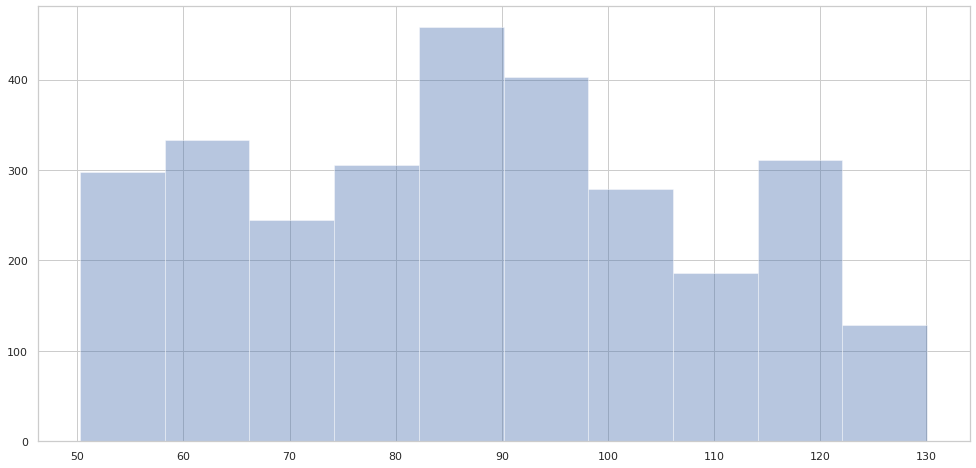

In [ ]:
sns.set(rc={'figure.figsize':(16.7,8)})
sns.set_style("whitegrid")
llimit = np.percentile(df.Coal_price.values, 1)
ulimit = np.percentile(df.Coal_price.values, 99)
df_plot = df[df['Coal_price'] > llimit]
df_plot = df_plot[df_plot['Coal_price'] < ulimit]
sns.distplot(df_plot.Coal_price.values, bins=10, kde=False);

In [ ]:
x_MinMax = pd.DataFrame(x_MinMax)
x_MinMax

,Coal_price
0,0.818283
1,0.818283
2,0.971745
3,0.980609
4,0.906925
...,...
3007,0.495291
3008,0.489197
3009,0.486981
3010,0.486981


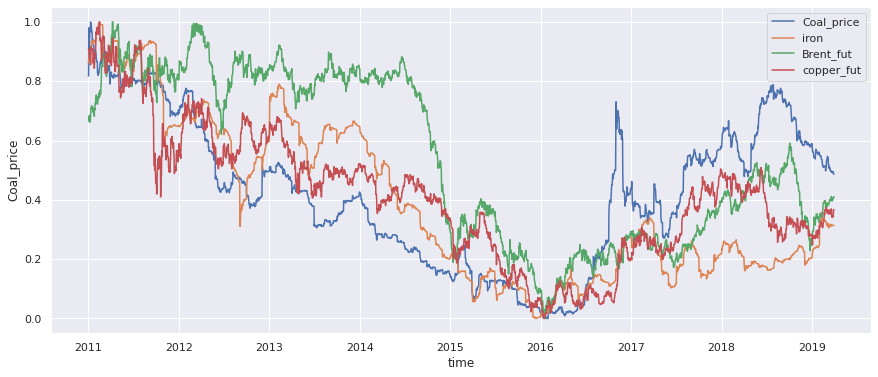

In [ ]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(14.7,6)})
ax = sns.lineplot(data = x_MinMax, x = df['ds'], y = 'Coal_price');
ax1 = sns.lineplot(data = x_MinMax1, x = df['ds'], y = 'iron');
ax2 = sns.lineplot(data = x_MinMax2, x = df['ds'], y = 'Brent_fut');
ax3 = sns.lineplot(data = x_MinMax3, x = df['ds'], y = 'copper_fut');
# ax1 = sns.lineplot(data = x_MinMax4, x = df['ds'], y = 'WTI_fut');
# ax1 = sns.lineplot(data = x_MinMax5, x = df['ds'], y = 'LNG_fut');
# ax1 = sns.lineplot(data = x_MinMax6, x = df['ds'], y = 'bdi');
# ax1 = sns.lineplot(data = x_MinMax7, x = df['ds'], y = 'USD/AUD(호주)');

plt.legend(labels = ['Coal_price','iron','Brent_fut','copper_fut'],loc = 'upper right')
plt.xlabel("time");
plt.show()

In [ ]:
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns



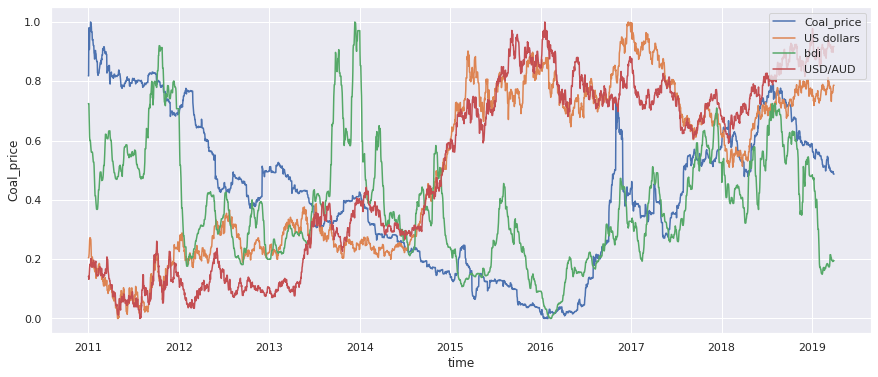

In [ ]:
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(14.7,6)})
ax = sns.lineplot(data = x_MinMax, x = df['ds'], y = 'Coal_price');
ax1 = sns.lineplot(data = x_MinMax4, x = df['ds'], y = 'US dollars');

ax2 = sns.lineplot(data = x_MinMax6, x = df['ds'], y = 'bdi');
ax3 = sns.lineplot(data = x_MinMax7, x = df['ds'], y = 'USD/AUD');

plt.legend(labels = ['Coal_price','US dollars','bdi','USD/AUD'],loc = 'upper right');
plt.xlabel("time");
plt.show()

In [ ]:
def getadvance(x):
    ret = 0
    if x > 0:
        ret = 1
    return(ret)
def get_month(dt):
    x = dt.strftime("%m")
    return(x)

In [ ]:
df['Coal_price'].shift(-1)

0       122.65
1       136.50
2       137.30
3       130.65
4       133.15
         ...  
3007     92.95
3008     92.75
3009     92.75
3010     92.75
3011       NaN
Name: Coal_price, Length: 3012, dtype: float64

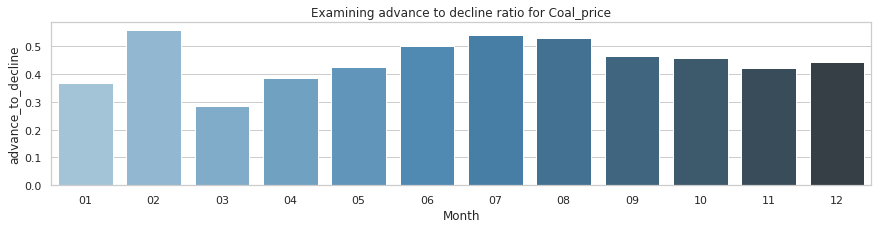

In [ ]:



sns.set(rc={'figure.figsize':(14.7,3)})
sns.set_style("whitegrid")
df = df.sort_values(by = "ds", ascending = False)
df['pCoal_price'] = df['Coal_price'].shift(-1)
df['delta'] = df['Coal_price'] - df['pCoal_price']
df['advance'] = list(map(getadvance, df['delta']))
df['Date'] = pd.to_datetime(df['ds'], format = "%Y-%m-%d")
df['Month'] =  list(map(get_month, df['ds']))
df_stats = df.groupby(["Month"]).agg(
                    advances = ("advance", "sum"), total = ("advance",  "count")).reset_index()
df_stats['advance_to_decline'] = df_stats['advances'] / (df_stats['total'] - df_stats['advances'])
plt.title("Examining advance to decline ratio for Coal_price")
ax  = sns.barplot(x="Month", y="advance_to_decline", data=df_stats, palette="Blues_d")
plt.show()

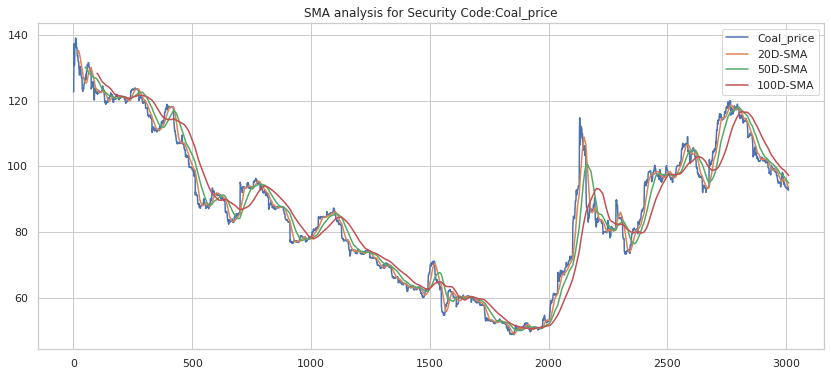

In [ ]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(14.10,6)})
sns.set_style("whitegrid")
df_s = df[['ds', 'Coal_price']].reset_index(drop = True)
df_s['20D-SMA'] = df_s['Coal_price'].rolling(window=20).mean()
df_s['50D-SMA'] = df_s['Coal_price'].rolling(window=50).mean()
df_s['100D-SMA'] = df_s['Coal_price'].rolling(window=100).mean()
df_s.set_index('ds')
del df_s['ds']
df_s.plot(title = "SMA analysis for Security Code:" + 'Coal_price');

In [ ]:
def ma_plot(a) :
    sns.set(rc={'figure.figsize':(14.10,6)})
    sns.set_style("whitegrid")
    df_s = df[['ds', a]].reset_index(drop = True)
    df_s['20D-SMA'] = df_s[a].rolling(window=20).mean()
    df_s['50D-SMA'] = df_s[a].rolling(window=50).mean()
    df_s['100D-SMA'] = df_s[a].rolling(window=100).mean()
    df_s.set_index('ds')
    del df_s['ds']
    df_s.plot(title = "SMA analysis for Security Code:" + str(a));

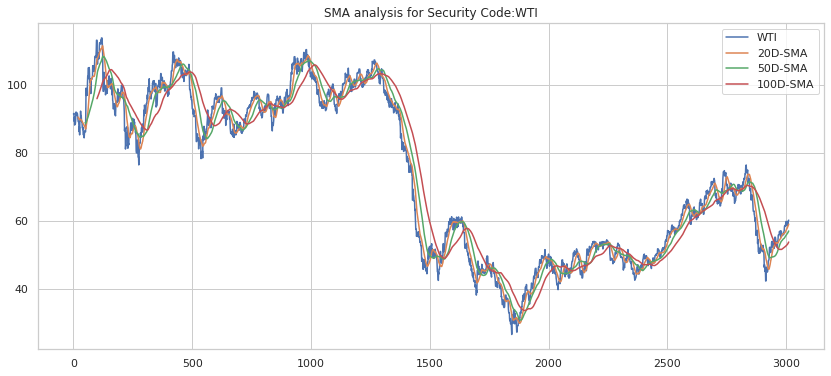

In [ ]:
ma_plot('WTI')

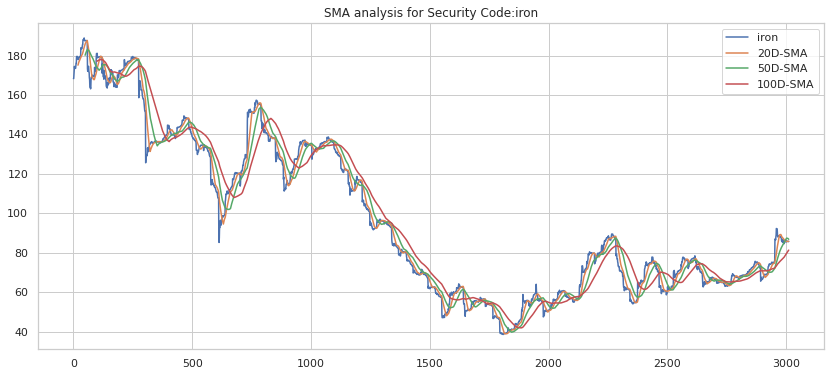

In [ ]:
ma_plot('iron')

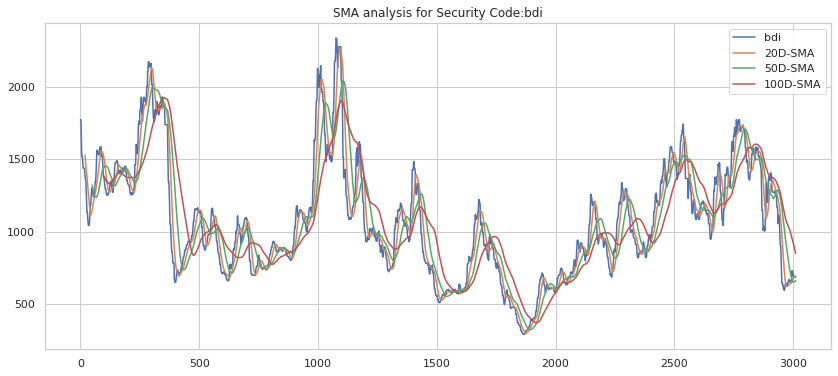

In [ ]:
ma_plot('bdi')

#2.Graph


## XGboost - 19.01~03 (xfeature)

In [ ]:
import pandas as pd
import numpy as np
import re
from datetime import date, datetime
import datetime
from google.colab import drive
drive.mount('/content/gdrive/')

import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgbm
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
df = pd.read_excel("/content/gdrive/My Drive/Black_coal/data/dataset/project_dataset.xlsx")

In [ ]:
period = 90

day_freq = 'D' #(day_freq를 'D'로하면 모든 날짜, 'B'로하면 주말 제외 주중만)

df['date'] = pd.to_datetime(df['date'])
df = df.set_index(df['date'])
df = df.drop(['date'],axis = 1)
_ = pd.DataFrame({'weekly': 0}, index = pd.date_range(df.head(1).index[0], df.tail(1).index[0], freq=day_freq))
_ = pd.concat([df, _], axis = 1)
_
_ = _.dropna()
df = _.drop('weekly',axis = 1)
df

,Coal_price,iron,Brent_fut,copper_fut,WTI_fut,WTI,LNG_fut,bdi,USD/AUD(호주),USD/CAD(캐나다),...,영국지수,독일지수,S&P500지수,항셍지수,나스닥지수,코스피지수,니케이225지수,유로스톡스50지수,호주지수,캐나다지수
2011-01-01,122.65,168.30,94.75,9644.00,91.38,91.40,61.07,1773.0,0.984470,0.99960,...,5899.899902,6914.189941,1257.640015,23035.449219,2652.870117,2051.000000,10228.919922,2807.040039,4745.200195,13443.200195
2011-01-02,122.65,168.30,94.75,9644.00,91.38,91.40,61.07,1773.0,0.984470,0.99960,...,5899.899902,6914.189941,1257.640015,23035.449219,2652.870117,2051.000000,10228.919922,2807.040039,4745.200195,13443.200195
2011-01-03,136.50,170.00,94.84,9644.00,91.55,91.56,61.07,1773.0,0.979010,0.99270,...,5899.899902,6989.740234,1271.869995,23436.050781,2691.520020,2070.080078,10228.919922,2839.429932,4745.200195,13443.200195
2011-01-04,137.30,172.10,93.53,9619.25,89.38,89.23,58.32,1693.0,0.983370,0.99239,...,6013.899902,6975.350098,1270.199951,23668.480469,2681.250000,2085.139893,10398.099609,2844.169922,4742.500000,13402.299805
2011-01-05,130.65,174.50,95.50,9586.00,90.30,90.38,56.40,1621.0,0.992850,0.99700,...,6043.899902,6939.819824,1276.560059,23757.820312,2702.199951,2082.550049,10380.769531,2833.739990,4714.899902,13396.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,79.85,155.02,51.29,7787.50,48.23,47.93,51.07,1366.0,1.314613,1.28482,...,6502.100098,13587.230469,3703.060059,26386.560547,12804.730469,2806.860107,26656.609375,3539.260010,6664.799805,17623.900391
2020-12-28,85.35,155.35,50.86,7787.50,47.62,47.87,51.07,1366.0,1.313730,1.28396,...,6502.100098,13790.290039,3735.360107,26314.630859,12899.419922,2808.600098,26854.029297,3575.409912,6664.799805,17623.900391
2020-12-29,84.20,155.57,51.09,7859.50,48.00,47.94,55.51,1366.0,1.317710,1.28400,...,6602.700195,13761.379883,3727.040039,26568.490234,12850.219727,2820.510010,27568.150391,3581.370117,6700.299805,17543.400391
2020-12-30,81.60,155.70,51.34,7847.50,48.40,48.22,55.82,1366.0,1.314078,1.28221,...,6555.799805,13718.780273,3732.040039,27147.109375,12870.000000,2873.469971,27444.169922,3571.590088,6682.399902,17545.800781


In [ ]:
df['next_coal_price'] = df['Coal_price'].shift(-1)
df = df.dropna()
#df = df.drop(['Coal_price'],axis = 1)
df= df[['next_coal_price', 'Coal_price', 'iron', 'Brent_fut', 'WTI_fut', 'WTI', 
        'LNG_fut', 'bdi', 'USD/AUD(호주)', 'USD/CAD(캐나다)', 'USD/COP(콜롬비아)', 'USD/IDR(인도네시아)', 
        'USD/RUB(러시아)', 'USD/ZAR(자메이카)', 'US 달러지수', '상하이종합지수', '인도지수', '브라질지수', 
        '다우존스지수', '프랑스지수', '영국지수', '독일지수', '호주지수', '캐나다지수', 
        'S&P500지수', '항셍지수', '나스닥지수', '코스피지수', '니케이225지수', '유로스톡스50지수']]
df.columns = ['Next_Coal', 'Coal', 'Iron', 'Brent_fut', 'WTI_fut', 'WTI', 
              'LNG_fut', 'BDI', 'AUD_dollar', 'CAD_dollor', 'COP_dollor', 'IDR_dollor', 
              'RUB_dollor', 'ZAR_dollor', 'DXY' , 'SHA', 'BSE', 'BVSP', 
              'DJI', 'CAC', 'FTSE', 'DAX', 'ASX', 'TSX', 
              'S&P500', 'HSI', 'IXIC', 'KOSPI', 'Nikkei225', 'SX5E']
df.head()

,Next_Coal,Coal,Iron,Brent_fut,WTI_fut,WTI,LNG_fut,BDI,AUD_dollar,CAD_dollor,...,FTSE,DAX,ASX,TSX,S&P500,HSI,IXIC,KOSPI,Nikkei225,SX5E
2011-01-01,122.65,122.65,168.3,94.75,91.38,91.40,61.07,1773.0,0.98447,0.99960,...,5899.899902,6914.189941,4745.200195,13443.200195,1257.640015,23035.449219,2652.870117,2051.000000,10228.919922,2807.040039
2011-01-02,136.50,122.65,168.3,94.75,91.38,91.40,61.07,1773.0,0.98447,0.99960,...,5899.899902,6914.189941,4745.200195,13443.200195,1257.640015,23035.449219,2652.870117,2051.000000,10228.919922,2807.040039
2011-01-03,137.30,136.50,170.0,94.84,91.55,91.56,61.07,1773.0,0.97901,0.99270,...,5899.899902,6989.740234,4745.200195,13443.200195,1271.869995,23436.050781,2691.520020,2070.080078,10228.919922,2839.429932
2011-01-04,130.65,137.30,172.1,93.53,89.38,89.23,58.32,1693.0,0.98337,0.99239,...,6013.899902,6975.350098,4742.500000,13402.299805,1270.199951,23668.480469,2681.250000,2085.139893,10398.099609,2844.169922
2011-01-05,133.15,130.65,174.5,95.50,90.30,90.38,56.40,1621.0,0.99285,0.99700,...,6043.899902,6939.819824,4714.899902,13396.000000,1276.560059,23757.820312,2702.199951,2082.550049,10380.769531,2833.739990


In [ ]:
index = df.index
col_names = df.columns

In [ ]:
train_end_time = datetime.date(2018, 12, 31)
test_end_time = train_end_time+ datetime.timedelta(period)
train_end_time = f'{train_end_time.year}-{train_end_time.month}-{train_end_time.day}'
test_end_time = f'{test_end_time.year}-{test_end_time.month}-{test_end_time.day}'
test_end_time = pd.date_range(train_end_time,test_end_time, freq=day_freq)

df = df.loc[df.index <= test_end_time[-1]].copy()

In [ ]:
test_end_time

DatetimeIndex(['2018-12-31', '2019-01-01', '2019-01-02', '2019-01-03',
               '2019-01-04', '2019-01-05', '2019-01-06', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-12', '2019-01-13', '2019-01-14', '2019-01-15',
               '2019-01-16', '2019-01-17', '2019-01-18', '2019-01-19',
               '2019-01-20', '2019-01-21', '2019-01-22', '2019-01-23',
               '2019-01-24', '2019-01-25', '2019-01-26', '2019-01-27',
               '2019-01-28', '2019-01-29', '2019-01-30', '2019-01-31',
               '2019-02-01', '2019-02-02', '2019-02-03', '2019-02-04',
               '2019-02-05', '2019-02-06', '2019-02-07', '2019-02-08',
               '2019-02-09', '2019-02-10', '2019-02-11', '2019-02-12',
               '2019-02-13', '2019-02-14', '2019-02-15', '2019-02-16',
               '2019-02-17', '2019-02-18', '2019-02-19', '2019-02-20',
               '2019-02-21', '2019-02-22', '2019-02-23', '2019-02-24',
      

In [ ]:
def create_features(df, col_name):
    X = df[col_name].drop(df.tail(1).index)
    y = df[col_name].shift(-1).drop(df.tail(1).index).rename("shift")
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    return X, y

In [ ]:
df[['Next_Coal', 'Coal']]

,Next_Coal,Coal
2011-01-01,122.65,122.65
2011-01-02,136.50,122.65
2011-01-03,137.30,136.50
2011-01-04,130.65,137.30
2011-01-05,133.15,130.65
...,...,...
2019-03-27,92.95,93.50
2019-03-28,92.75,92.95
2019-03-29,92.75,92.75
2019-03-30,92.75,92.75


In [ ]:
# params = {'objective': 'regression', 
#           'num_leaves': 5, 
#           'learning_rate': 0.1, 
#           'max_depth': 10,  
#           #'max_bin': 55, 
#           #'bagging_fraction': 0.8, 
#           #'bagging_freq': 5,
#           #'feature_fraction': 0.8, 
#           #'feature_fraction_seed': 9,
#           #'bagging_seed': 9, 
#           #'min_data_in_leaf': 6, 
#           #'min_sum_hessian_in_leaf': 11
#           }

In [ ]:
final_df = df[['Next_Coal', 'Coal']]
true_df = pd.DataFrame()
for k in range(2,len(col_names)):
  df_X, df_y = create_features(df, col_names[k])
  df_y_rate = pd.DataFrame({"y_rate" : (df_y['shift']-df_X[col_names[k]])}, index = df_y.index)
  test_split_date = '2018-12-31'
  #val_split_date = '2017-12-31'
  
  train_X = df_X.loc[df_X.index < test_split_date].copy()
  #val_X = train_X.loc[train_X.index > val_split_date].copy()
  #train_X = train_X.loc[train_X.index <= val_split_date].copy()
  test_X = df_X.loc[df_X.index >= test_split_date].copy()

  train_y_rate = df_y_rate.loc[df_y_rate.index < test_split_date].copy()
  #val_y_rate = train_y_rate.loc[train_y_rate.index > val_split_date].copy()
  #train_y_rate = train_y_rate.loc[train_y_rate.index <= val_split_date].copy()
  test_y_rate = df_y_rate.loc[df_y_rate.index >= test_split_date].copy()

  train_y = df_y.loc[df_y.index < test_split_date].copy()
  test_y = df_y.loc[df_y.index >= test_split_date].copy()

  # split_date = '2018-12-31'
  # train_X = df_X.loc[df_X.index < split_date].copy()
  # test_X = df_X.loc[df_X.index >= split_date].copy()
  # train_y_rate = df_y_rate.loc[df_y_rate.index < split_date].copy()
  # test_y_rate = df_y_rate.loc[df_y_rate.index >= split_date].copy()
  # train_y = df_y.loc[df_y.index < split_date].copy()
  # test_y = df_y.loc[df_y.index >= split_date].copy()




  reg = xgb.XGBRegressor(learning_rate=0.6,max_depth=1,n_estimators=90)
  reg.fit(train_X, train_y_rate,
          eval_set=[(train_X, train_y_rate), (test_X, test_y_rate)],
          early_stopping_rounds=100,
          verbose=False)
  

  df_y_pred = test_X.head(1)
  for i in range(len(test_end_time)):
    y_pred = reg.predict(df_y_pred.tail(1))
    y_pred = y_pred+df_y_pred[col_names[k]].tail(1)
    _ = df_y_pred.tail(1).index+datetime.timedelta(days=1)
    _ = pd.date_range(_[0],periods = 1, freq = day_freq)
    frame = pd.DataFrame({col_names[k]:y_pred[0]},index = _)
    frame
    df_y_pred = df_y_pred.append(frame)
    _ = pd.concat([train_X, df_y_pred])
  final_df = pd.concat([final_df, _], axis=1)
  true_df = pd.concat([true_df, test_X], axis=1)

[08:22:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:22:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:22:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:22:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:22:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:22:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:22:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:22:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

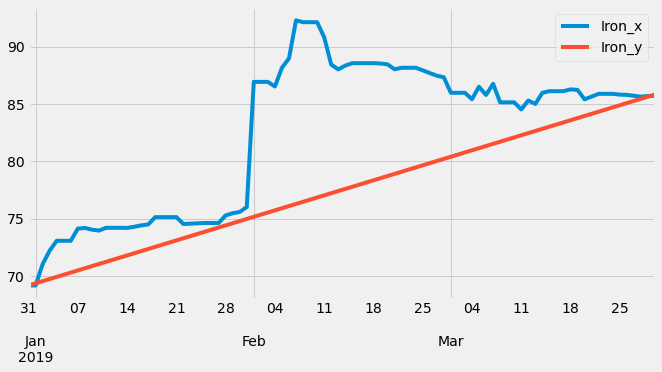

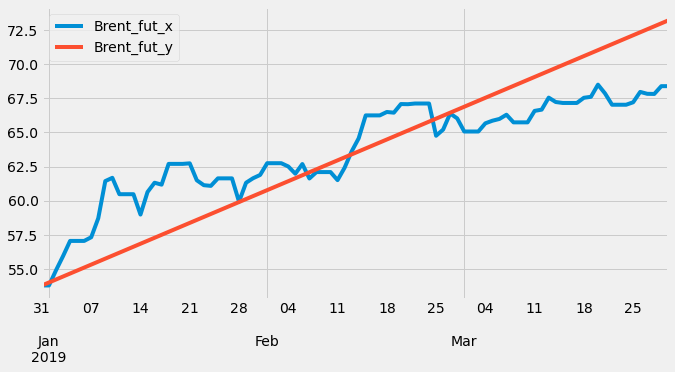

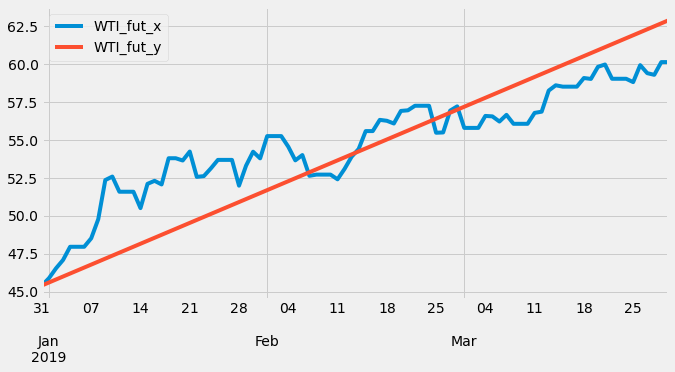

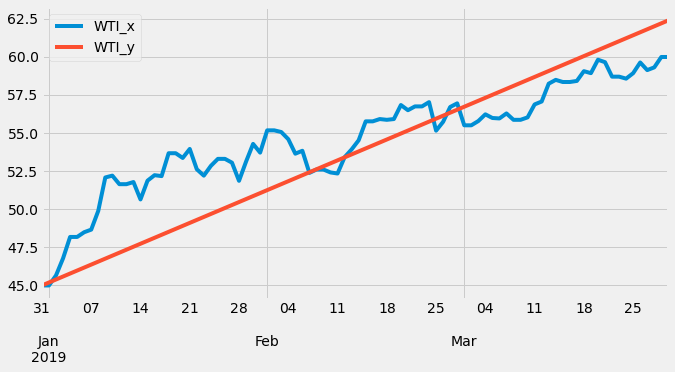

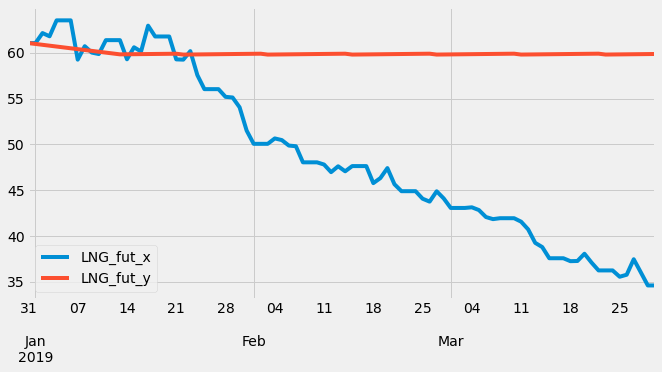

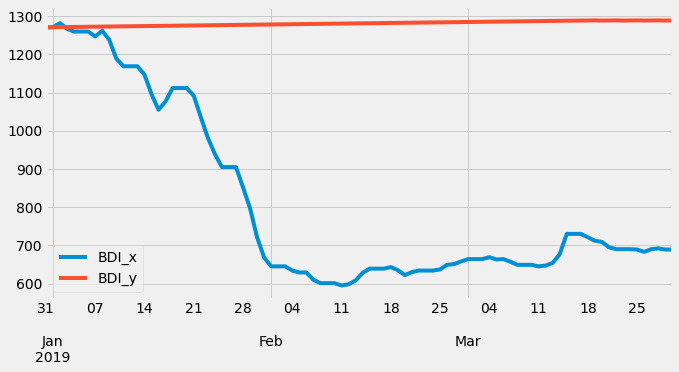

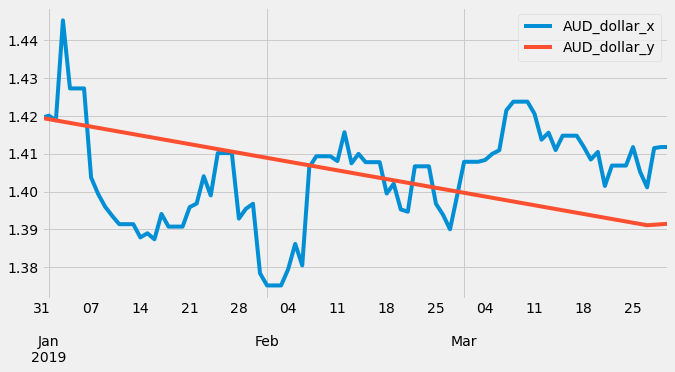

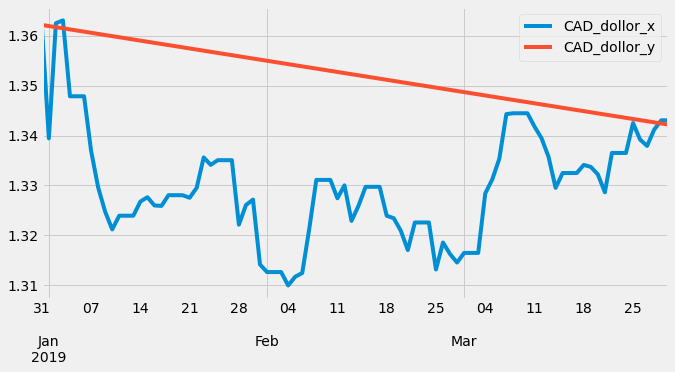

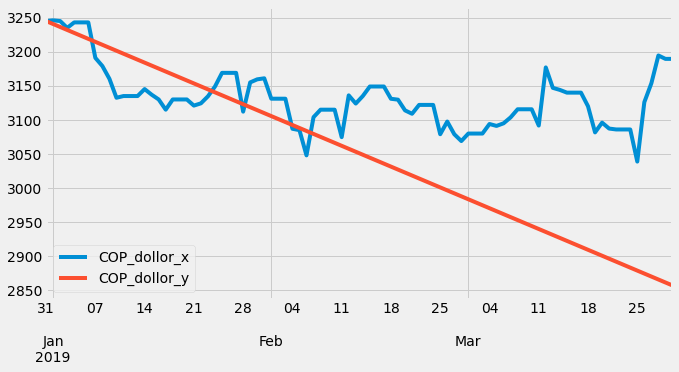

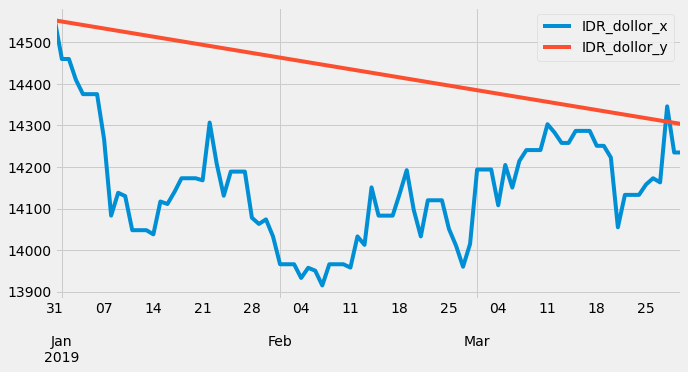

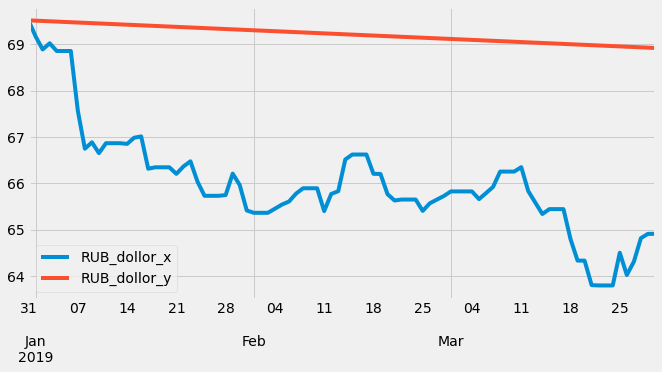

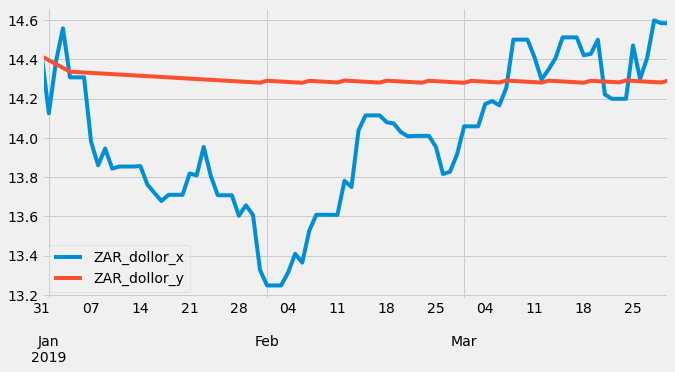

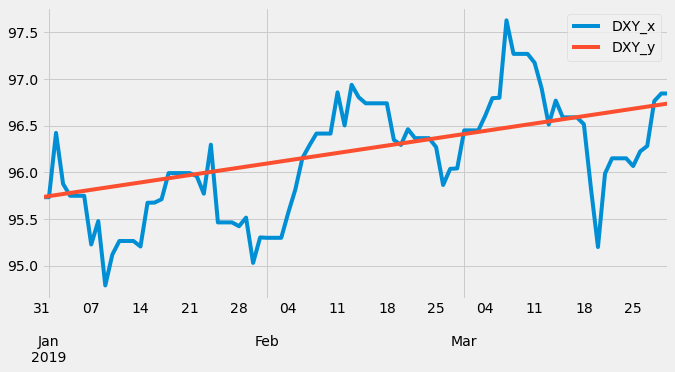

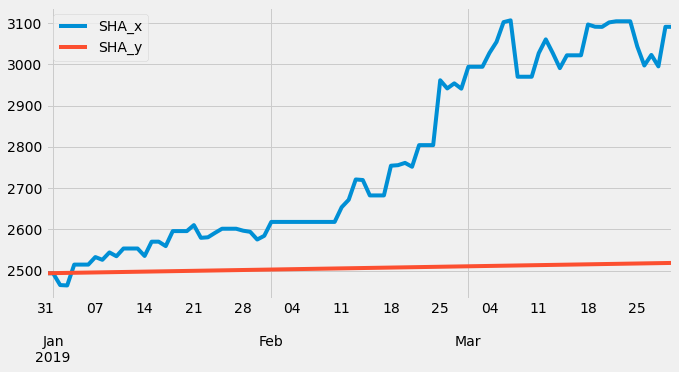

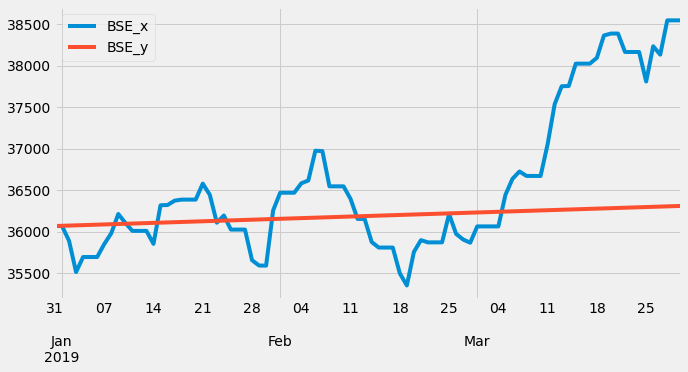

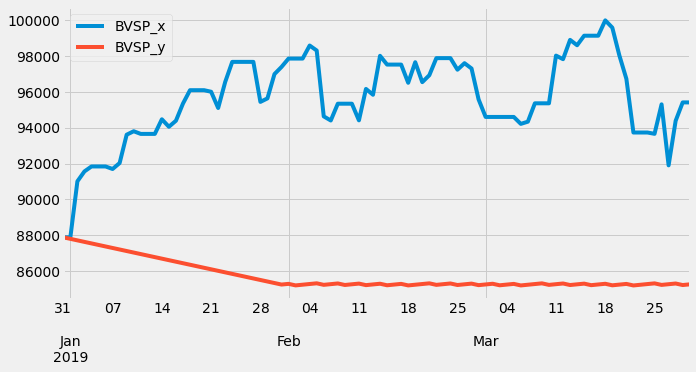

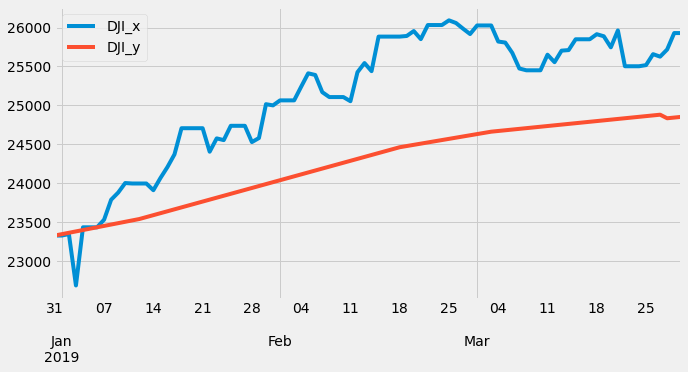

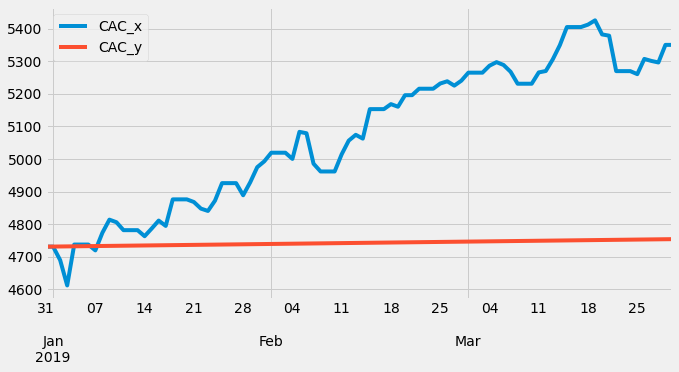

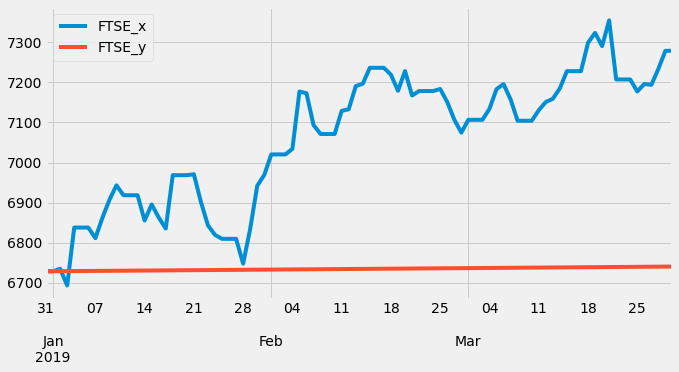

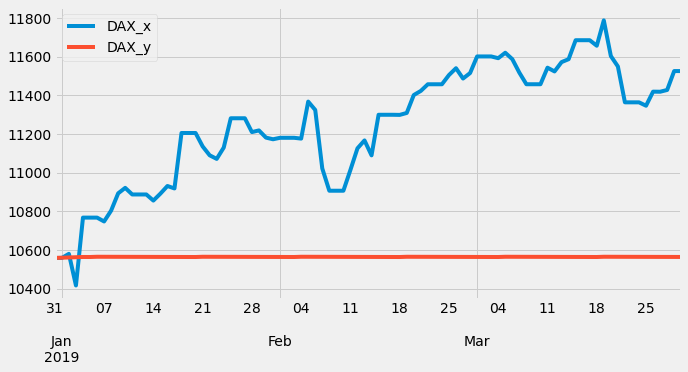

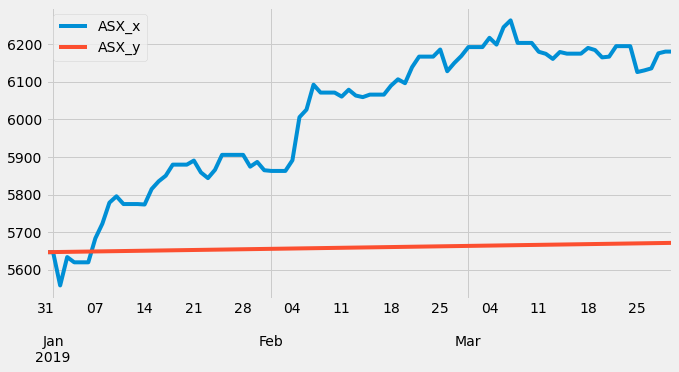

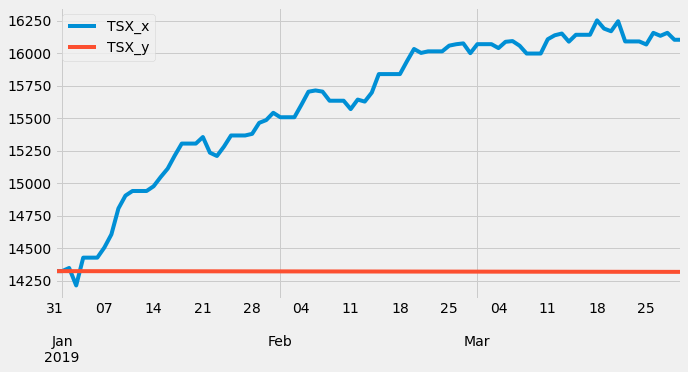

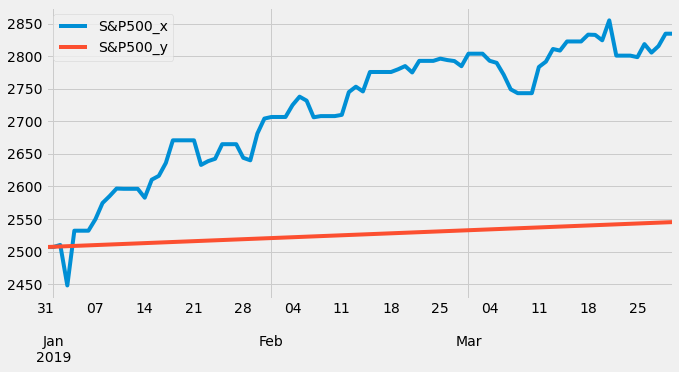

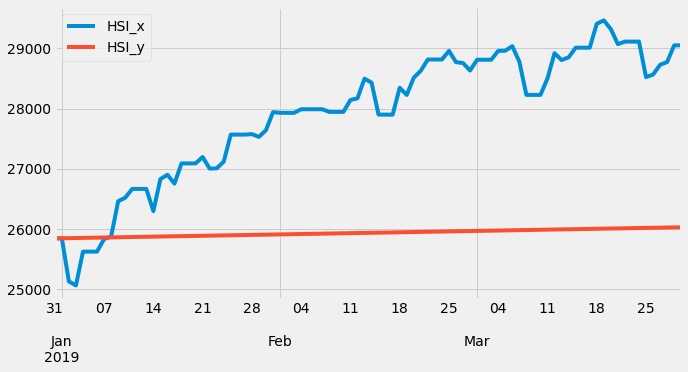

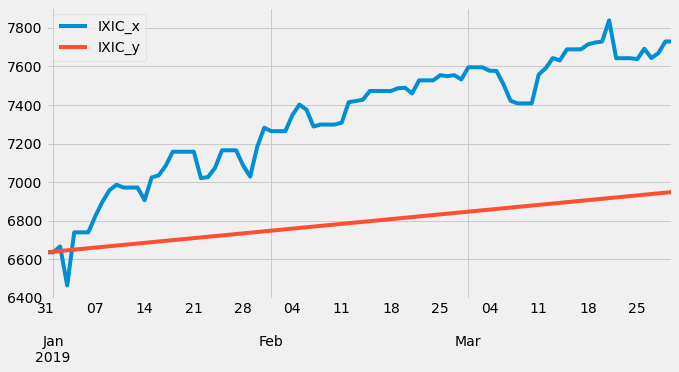

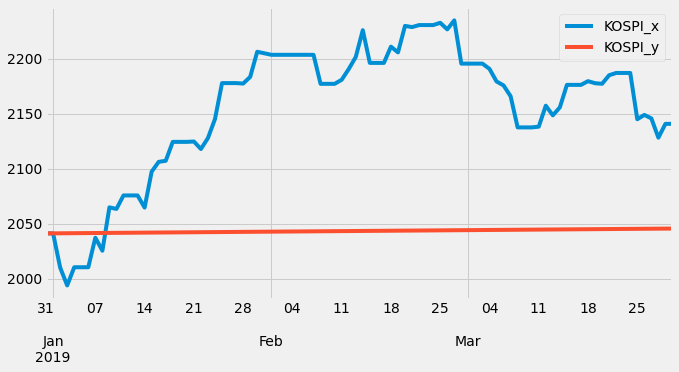

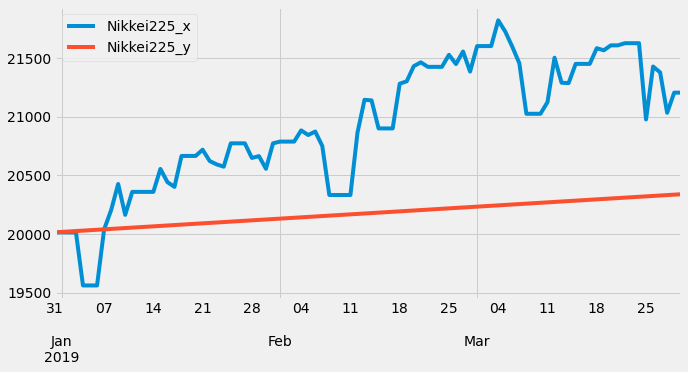

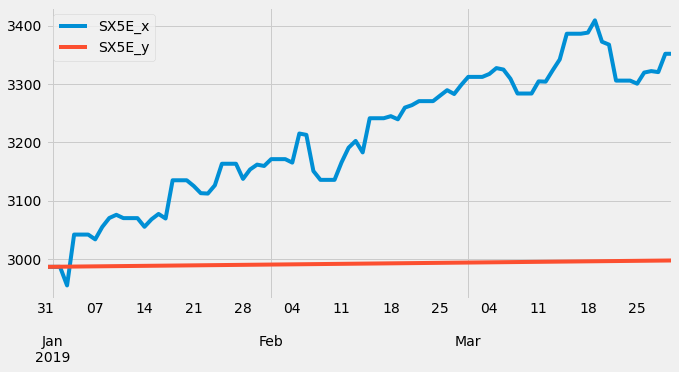

In [ ]:
for i in range(2, len(col_names)):
  _ = pd.merge(true_df[col_names[i]], final_df[col_names[i]], how = 'left', left_index = True, right_index=True)
  _ = _.plot(figsize=(10, 5))

In [ ]:
final_df.to_csv("/content/drive/MyDrive/유연탄 데이터/project/final_df_using_XGB_2017-01-01.csv",encoding = 'utf-8-sig')

# **3.Graph**


In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/Black_coal/data/dataset/project_dataset.csv", encoding = 'utf-8-sig')
df = df.sort_values('date')
df['date']= pd.to_datetime(df['date'])

df = df.set_index('date')
df = df[df.index < '2019-04-01']
df = df.reset_index()
df

,date,Coal_price,iron,Brent_fut,copper_fut,WTI_fut,WTI,LNG_fut,bdi,USD/AUD(호주),...,영국지수,독일지수,S&P500지수,항셍지수,나스닥지수,코스피지수,니케이225지수,유로스톡스50지수,호주지수,캐나다지수
0,2011-01-01,122.65,168.30,94.75,"9,644.00",91.38,91.40,61.07,1773.0,0.98447,...,5899.899902,6914.189941,1257.640015,23035.449219,2652.870117,2051.000000,10228.919922,2807.040039,4745.200195,13443.200195
1,2011-01-02,122.65,168.30,94.75,"9,644.00",91.38,91.40,61.07,1773.0,0.98447,...,5899.899902,6914.189941,1257.640015,23035.449219,2652.870117,2051.000000,10228.919922,2807.040039,4745.200195,13443.200195
2,2011-01-03,136.50,170.00,94.84,"9,644.00",91.55,91.56,61.07,1773.0,0.97901,...,5899.899902,6989.740234,1271.869995,23436.050781,2691.520020,2070.080078,10228.919922,2839.429932,4745.200195,13443.200195
3,2011-01-04,137.30,172.10,93.53,"9,619.25",89.38,89.23,58.32,1693.0,0.98337,...,6013.899902,6975.350098,1270.199951,23668.480469,2681.250000,2085.139893,10398.099609,2844.169922,4742.500000,13402.299805
4,2011-01-05,130.65,174.50,95.50,"9,586.00",90.30,90.38,56.40,1621.0,0.99285,...,6043.899902,6939.819824,1276.560059,23757.820312,2702.199951,2082.550049,10380.769531,2833.739990,4714.899902,13396.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007,2019-03-27,93.50,85.72,67.83,"6,336.00",59.41,59.12,37.47,690.0,1.40115,...,7194.200195,11419.040039,2805.370117,28728.250000,7643.379883,2145.620117,21378.730469,3322.040039,6136.000000,16132.500000
3008,2019-03-28,92.95,85.64,67.82,"6,368.75",59.30,59.30,36.05,692.0,1.41153,...,7234.299805,11428.160156,2815.439941,28775.210938,7669.169922,2128.100098,21033.759766,3320.290039,6176.100098,16155.500000
3009,2019-03-29,92.75,85.70,68.39,"6,475.75",60.14,59.98,34.61,689.0,1.41180,...,7279.200195,11526.040039,2834.399902,29051.359375,7729.319824,2140.669922,21205.810547,3351.709961,6180.700195,16102.099609
3010,2019-03-30,92.75,85.70,68.39,"6,475.75",60.14,59.98,34.61,689.0,1.41180,...,7279.200195,11526.040039,2834.399902,29051.359375,7729.319824,2140.669922,21205.810547,3351.709961,6180.700195,16102.099609


## Prophet -19.01~03(xfeature)

In [ ]:
def prophetm(df, z, x, y) :
  
        #a = prophetm(z, x, y) 
        df1 = df[['date', z]]
      
    
        df1.columns = ['ds', 'y']
        df1['ds']= pd.to_datetime(df1['ds'])
        
      
        train = df1.drop(df.index[x:])
        y_true = df1['y'][y:].values 
        
      
        last_1year = pd.date_range('2019-01-01', periods=90)
        last_1year = list(last_1year)
        last_1year = pd.DataFrame(last_1year, columns = ['ds'])
        last_1year['ds']= pd.to_datetime(last_1year['ds'])
        m = Prophet(
        # trend
                changepoint_prior_scale=0.05,
        # seasonality
                weekly_seasonality=10,
                yearly_seasonality=20,
              daily_seasonality=False,)
        m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
        forecast = m.fit(train).predict(last_1year)
        # fig = m.plot_components(forecast)
        # a = add_changepoints_to_plot(fig.gca(), m, forecast)
        y_pred = forecast['yhat'].values
       
        return y_pred, last_1year['ds'], y_true
      
# z = str(input('컬럼명 입력(''제외 입력): '))
# x = int(input('삭제할 주 단위를 입력해주세요(-붙여서): '))
# y = int(input('필요한 y값의 월 단위를 입력해주세요(-붙여서): '))




# print('-------------done------------')
# print('y_pred result: {} '  .format(y_pred))


MAE: 488.763
MAPE: 0.696


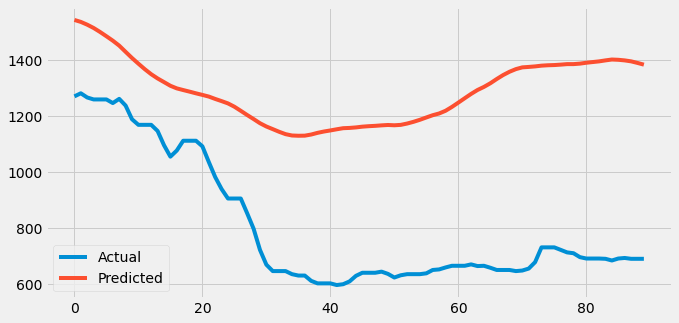

In [ ]:
# 함수에 적용과 데이터 프레임 만들어 값 넣어주기
y_tt = prophetm(df, 'bdi', -90, -90)
y_tt = pd.DataFrame(y_tt)
y_tt = y_tt.T
y_tr = y_tt[[1,2]]
y_tr = y_tr.rename(columns ={2:'y_true',1:'ds'})
y_tt = y_tt[[1,0]]
y_tt = y_tt.rename(columns ={0:'y_pred',1:'ds'})
# print(y_tt)
# print(y_true)

# 예측하고 비교하기
# 여기에서는 MAE를 살펴본다.

y_pred = y_tt['y_pred'].values
y_true = y_tr['y_true'].values
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
plt.figure(figsize=(10, 5))
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()

plt.show()

In [ ]:
def maker(a):
    y_tt = prophetm(df, a, -90, -90)
    y_tt = pd.DataFrame(y_tt)
    y_tt = y_tt.T
    y_tr = y_tt[[1,2]]
    y_tr = y_tr.rename(columns ={2:'y_true',1:'ds'})
    y_tt = y_tt[[1,0]]
    y_tt = y_tt.rename(columns ={0:'y_pred',1:'ds'})
    # print(y_tt)
    # print(y_true)

    # 예측하고 비교하기
    # 여기에서는 MAE를 살펴본다.

    y_pred = y_tt['y_pred'].values
    y_true = y_tr['y_true'].values
    from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    plt.figure(figsize=(10,5))
    print('MAE: %.3f' % mae)
    print('MAPE: %.3f' % mape)
    plt.plot(y_true, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.legend()
    
    plt.show()

MAE: 8.473
MAPE: 0.098


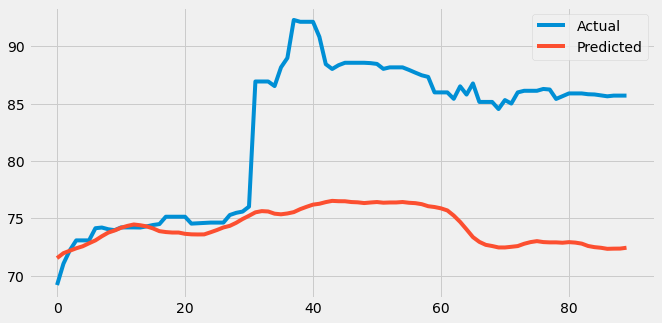

In [ ]:
maker('iron')

###ee

In [ ]:
df.columns

Index(['date', 'Coal_price', 'iron', 'Brent_fut', 'copper_fut', 'WTI_fut',
       'WTI', 'LNG_fut', 'bdi', 'USD/AUD(호주)', 'USD/CAD(캐나다)', 'USD/COP(콜롬비아)',
       'US 달러지수', 'USD/IDR(인도네시아)', 'USD/RUB(러시아)', 'USD/ZAR(자메이카)', '상하이종합지수',
       '인도지수', '브라질지수', '다우존스지수', '프랑스지수', '영국지수', '독일지수', 'S&P500지수', '항셍지수',
       '나스닥지수', '코스피지수', '니케이225지수', '유로스톡스50지수', '호주지수', '캐나다지수'],
      dtype='object')

In [ ]:
df.iloc[:,2].name

'iron'

MAE: 8.473
MAPE: 0.098


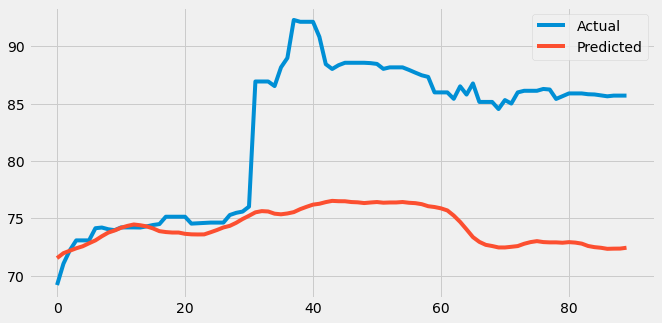

iron
MAE: 16.650
MAPE: 0.262


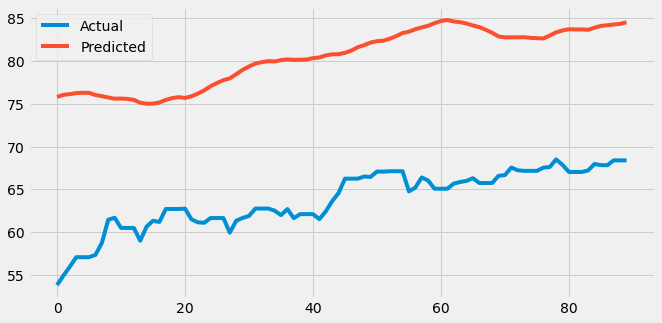

Brent_fut


ValueError: ignored

In [ ]:
for i in range(2,31):
  maker(df.iloc[:,i].name)
  print(df.iloc[:,i].name)
print('---------------------done---------------------')

MAE: 15.557
MAPE: 0.286


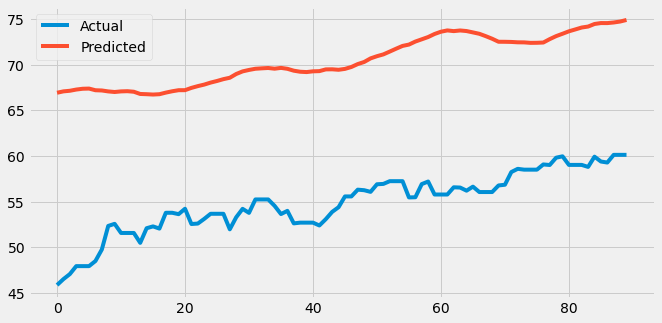

WTI_fut
MAE: 15.857
MAPE: 0.292


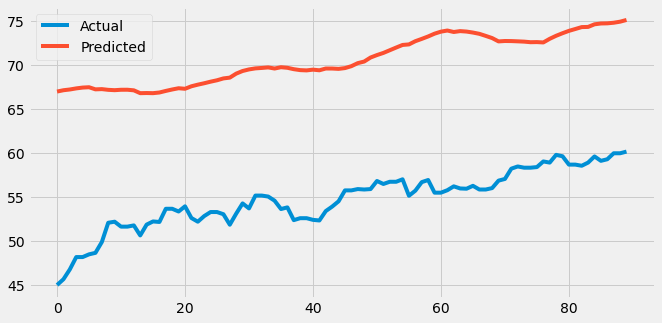

WTI
MAE: 22.361
MAPE: 0.513


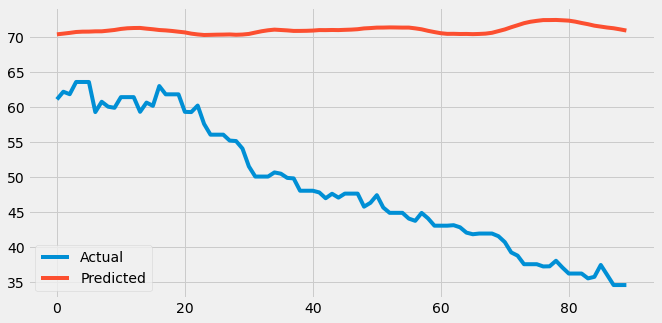

LNG_fut
MAE: 488.763
MAPE: 0.696


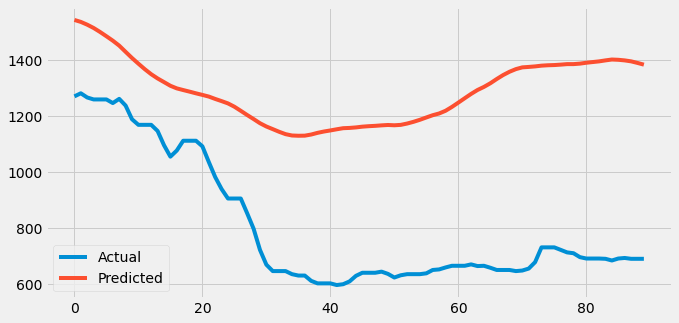

bdi
MAE: 0.030
MAPE: 0.022


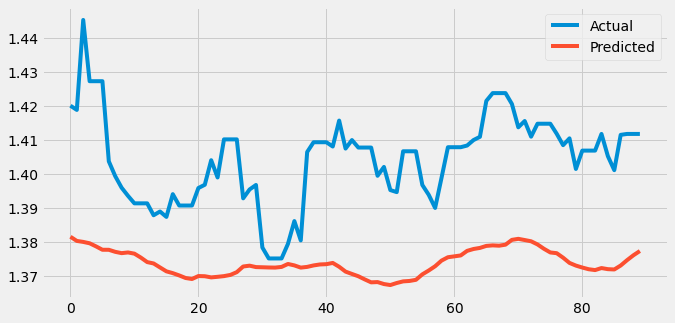

USD/AUD(호주)
MAE: 0.017
MAPE: 0.013


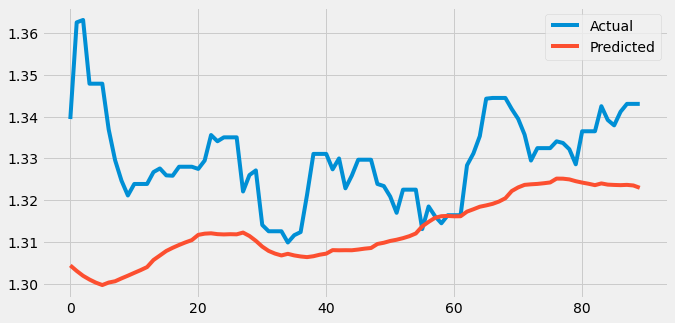

USD/CAD(캐나다)
MAE: 112.190
MAPE: 0.036


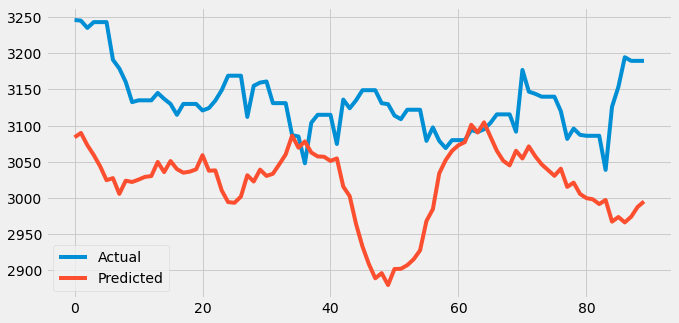

USD/COP(콜롬비아)
MAE: 3.284
MAPE: 0.034


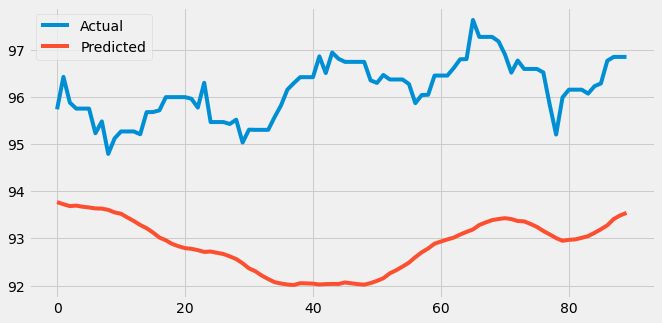

US 달러지수
MAE: 727.096
MAPE: 0.051


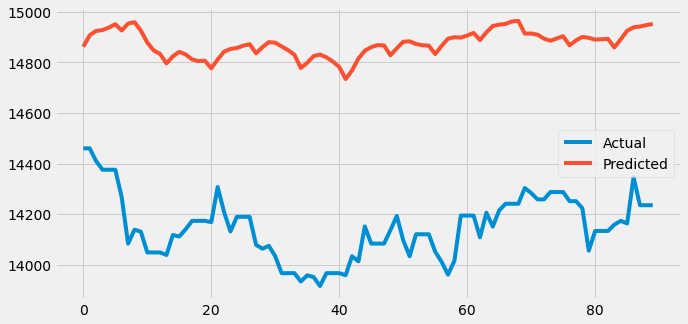

USD/IDR(인도네시아)
MAE: 1.647
MAPE: 0.025


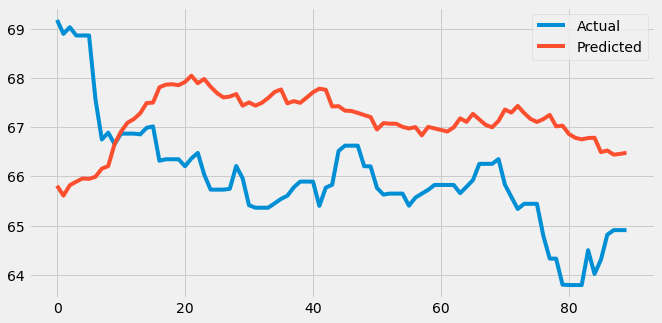

USD/RUB(러시아)
MAE: 0.496
MAPE: 0.035


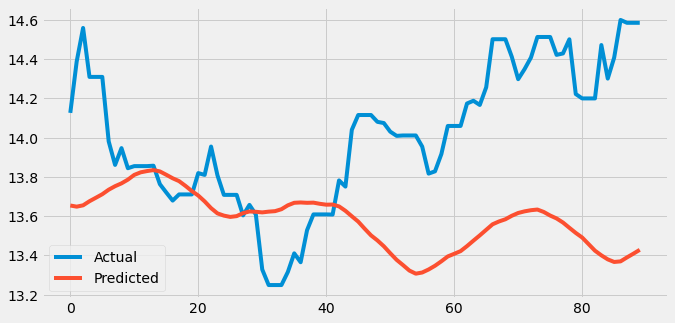

USD/ZAR(자메이카)
MAE: 219.740
MAPE: 0.077


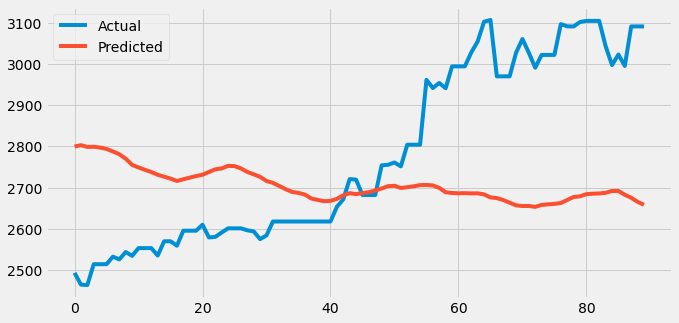

상하이종합지수
MAE: 1109.015
MAPE: 0.031


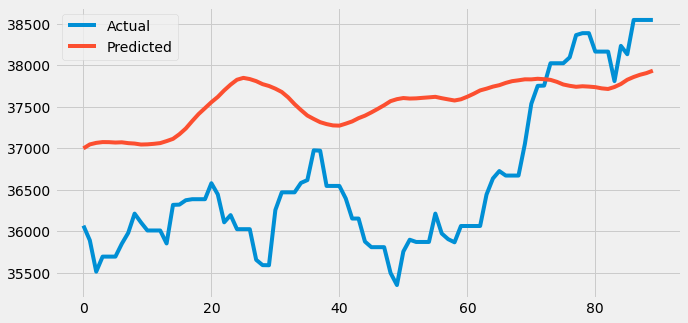

인도지수
MAE: 4974.768
MAPE: 0.052


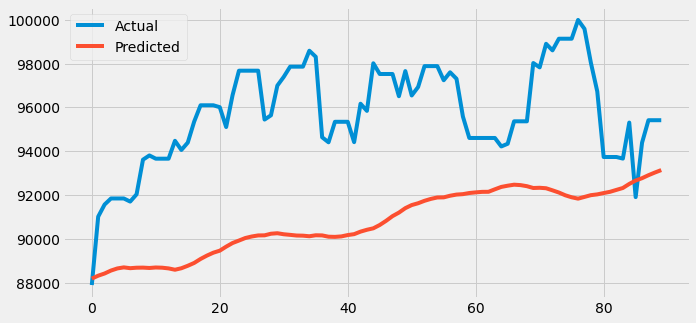

브라질지수
MAE: 1761.453
MAPE: 0.071


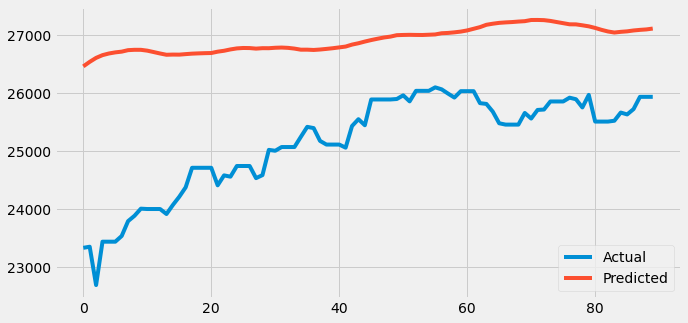

다우존스지수
MAE: 217.325
MAPE: 0.044


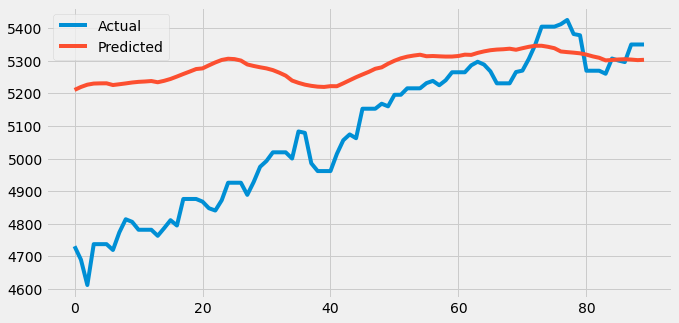

프랑스지수
MAE: 266.556
MAPE: 0.038


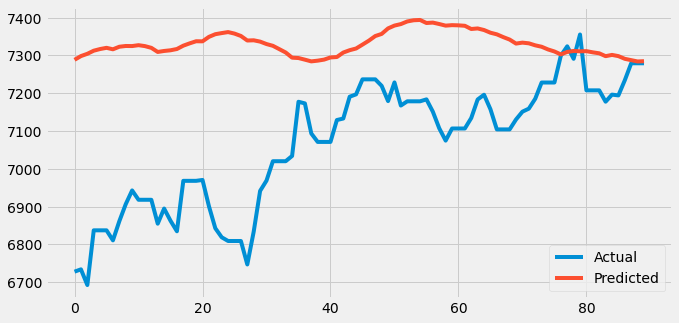

영국지수
MAE: 691.792
MAPE: 0.062


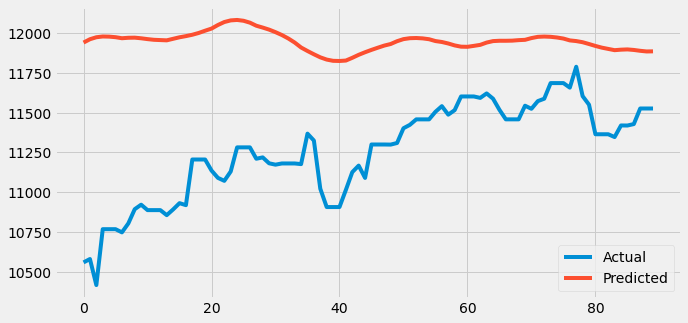

독일지수
MAE: 180.787
MAPE: 0.068


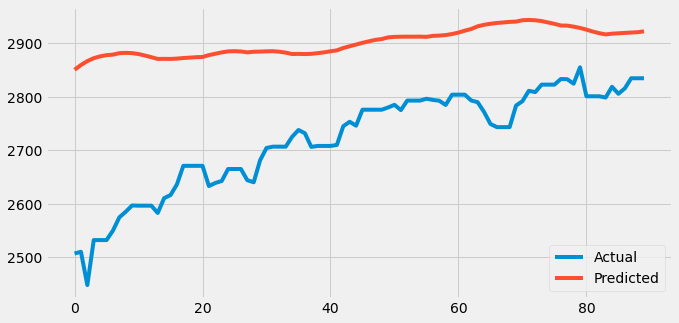

S&P500지수
MAE: 1362.626
MAPE: 0.050


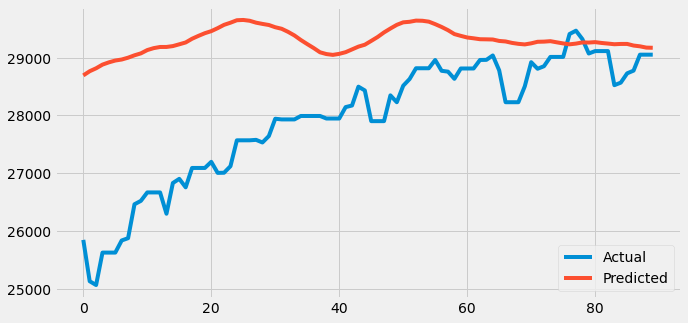

항셍지수
MAE: 692.987
MAPE: 0.096


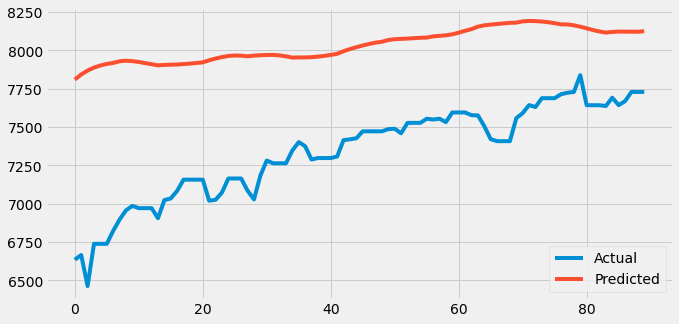

나스닥지수
MAE: 90.915
MAPE: 0.043


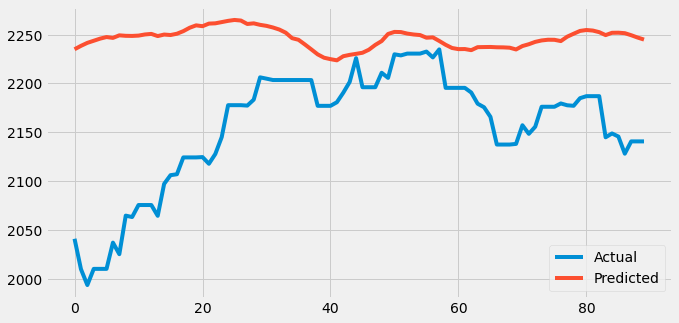

코스피지수
MAE: 2605.460
MAPE: 0.125


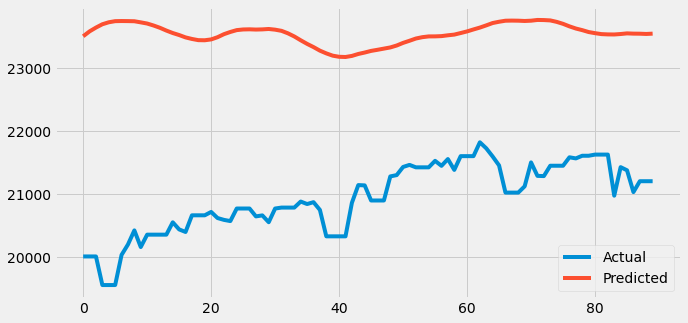

니케이225지수
MAE: 99.905
MAPE: 0.032


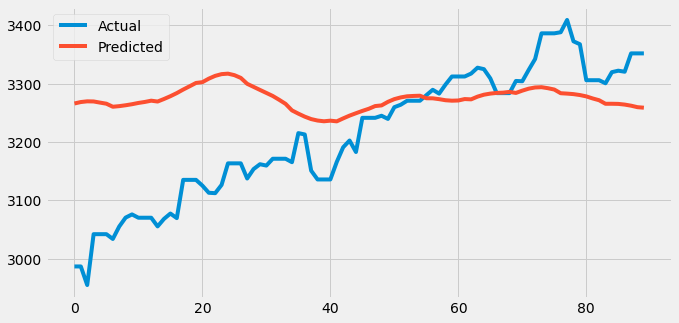

유로스톡스50지수
MAE: 134.413
MAPE: 0.023


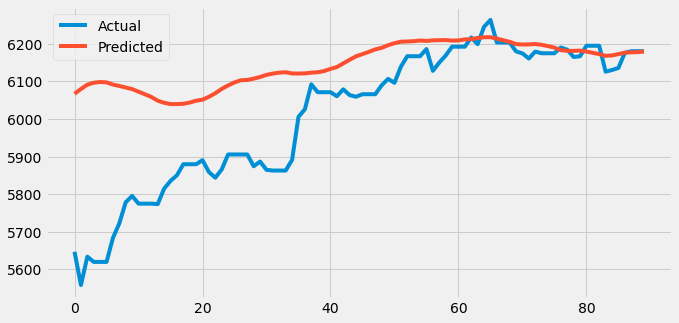

호주지수
MAE: 357.932
MAPE: 0.024


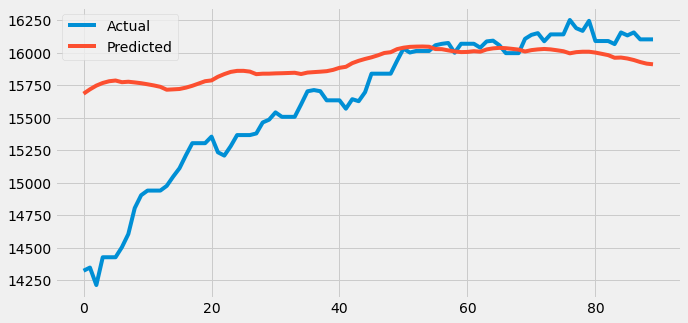

캐나다지수
---------------------done---------------------


In [ ]:
for i in range(5,31):
  maker(df.iloc[:,i].name)
  print(df.iloc[:,i].name)
print('---------------------done---------------------')